<center> <h1>Load the DataFrame of Actives and TrueInactives</h1> </center>

In [1]:
actives_df = read.csv("data/Actives.csv")
pubchem_df = read.csv("data/TrueInactives.csv")
actives_df$ID = as.character(actives_df$ID)
pubchem_df$ID = as.character(pubchem_df$ID)
actives_df$Group = "Active"
pubchem_df$Group = "Inactive"
test_set_1 = rbind(actives_df, pubchem_df)

In [2]:
scale =  function(x) (x-max(x))/(min(x) - max(x))

In [3]:
test_set_1$normalized_smina = scale(as.numeric(test_set_1$minimizedAffinity))

<center> <h2>AUC-PR</h2> </center>

In [4]:
source("script.R")

In [5]:
smina <- pr.curve(scores.class0= test_set_1[test_set_1$Group=="Active",]$normalized_smina,
               scores.class1= test_set_1[test_set_1$Group=="Inactive",]$normalized_smina,
               curve=T)
ifp <- pr.curve(scores.class0= test_set_1[test_set_1$Group=="Active",]$IFP_scores,
               scores.class1= test_set_1[test_set_1$Group=="Inactive",]$IFP_scores,
               curve=T)
cnn <- pr.curve(scores.class0= test_set_1[test_set_1$Group=="Active",]$CNNscore,
               scores.class1= test_set_1[test_set_1$Group=="Inactive",]$CNNscore,
               curve=T)


In [6]:
smina


  Precision-recall curve

    Area under curve (Integral):
     0.1200219 

    Area under curve (Davis & Goadrich):
     0.1200006 

    Curve for scores from  0  to  1 
    ( can be plotted with plot(x) )


<center> <h2>Precision-Recall Plot</h2> </center>

In [7]:
source("plot_script.R")

In [8]:
smina_df = get_recall_precision(smina)
smina_df$Group = "SMINA"
ifp_df = get_recall_precision(ifp)
ifp_df$Group = "IF"
cnn_df = get_recall_precision(cnn)
cnn_df$Group = 'CNN'
df_ggplot = rbind(smina_df, ifp_df, cnn_df)

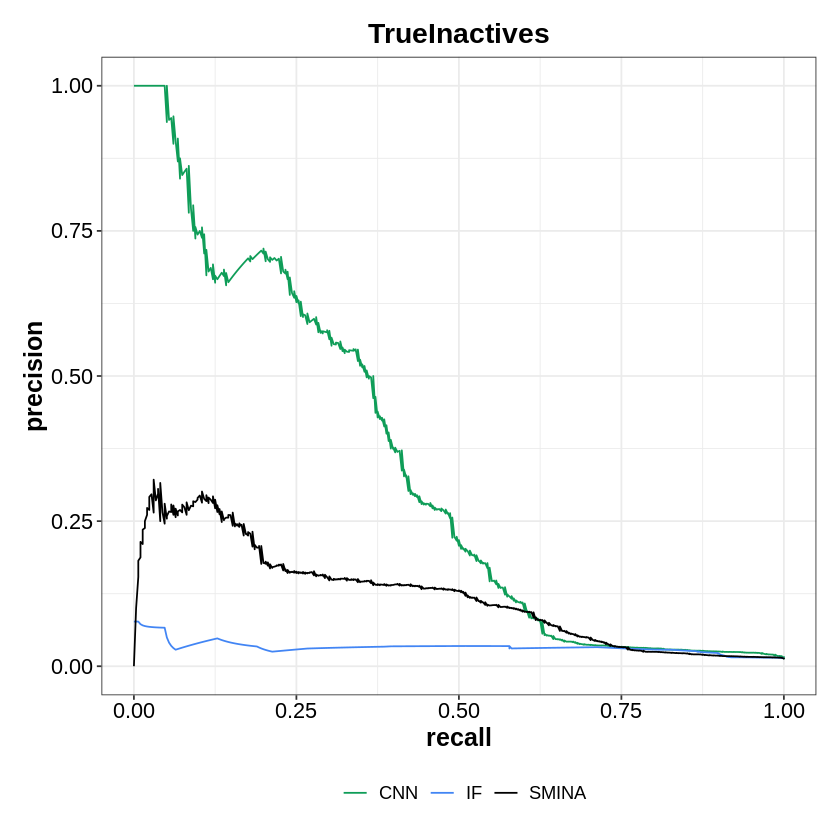

In [10]:
library(ggplot2)
ggplot(data = df_ggplot, aes(x = recall, y = precision, colour= Group, fill = Group)) +
  geom_line() + theme_bw() + ggtitle("TrueInactives") + 
  scale_colour_manual(values = c("#0F9D58", "#4285F4", "#000000")) + 
  theme(legend.position = 'bottom',
        legend.title= element_blank(),
        legend.text = element_text(size = 11),
        plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm"),
        plot.title = element_text(face = "bold", size = 17, hjust = 0.5),
        axis.title = element_text(size = 15, colour= "black", face = "bold"), 
        axis.text = element_text(size= 13, colour = "black"))
